In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
class plot_error_surfaces(object):
  def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
    W = np.linspace(-w_range, w_range, n_samples)
    B = np.linspace(-b_range, b_range, n_samples)
    w, b = np.meshgrid(W, B)
    Z = np.zeros((30,30))
    count1 = 0
    self.y = Y.numpy()
    self.x = X.numpy()
    for w1, b1 in zip(w, b):
      count2 = 0
      for w2, b2 in zip(w1, b1):
        Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
        count2 +=1
      count1 +=1
    self.Z = Z
    self.w = w
    self.b = b
    self.W = []
    self.B = []
    self.LOSS = []
    self.n = 0
    if go == True:
      plt.figure()
      plt.figure(figsize = (7.5,5))
      plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride = 1, cmap='viridis', edgecolor='none')
      plt.title('Cost/Total Loss Surface')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.show()
      plt.figure()
      plt.title('Cost/Total Loss Surface Contour')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.contour(self.w, self.b, self.Z)
      plt.show()

    def set_para_loss(self, W, B, loss):
      self.n = self.n +1
      self.W.append(W)
      self.B.append(B)
      self.LOSS.append(loss)
    
    def final_plot(self):
      ax = plt.axes(projection = '3d')
      ax.plot_wireframe(self.w, self.b, self.Z)
      ax.scatter(self.W, self.B, self.LOSS, c='r', marker ='x', s = 200, alpha = 1)
      plt.figure()
      plt.contour(self.w, self.b, self.Z)
      plt.scatter(self.W, self.B, c='r', marker='x')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.show()
    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [0]:
import torch

In [0]:
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1 * X -1

In [0]:
Y = f+0.1*torch.randn(X.size())

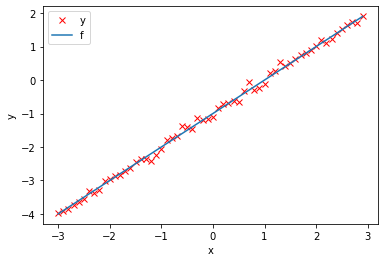

In [11]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label='y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [0]:
def forward(x):
  return w * x+ b

In [0]:
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

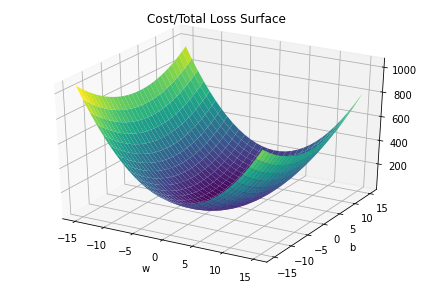

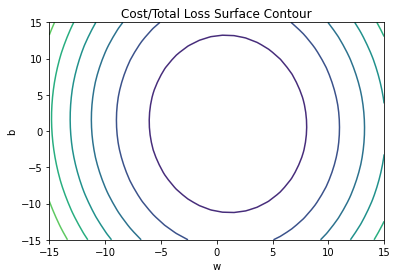

In [25]:
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [0]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [0]:
lr = 0.1
LOSS = []

In [0]:
def train_model(iter):
  for epoch in range(iter):
    Yhat = forward(X)

    loss = criterion(Yhat, Y)

    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    if epoch % 3 == 0:
        get_surface.plot_ps()
    
    LOSS.append(loss)

    loss.backward()

    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()

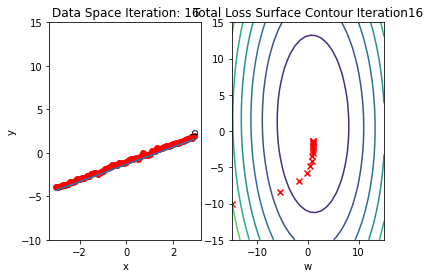

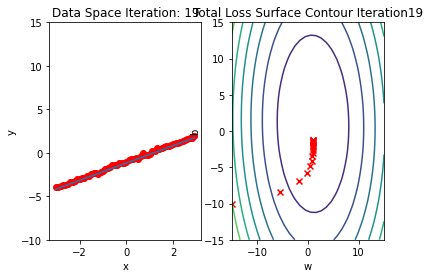

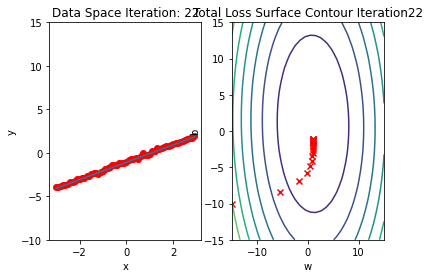

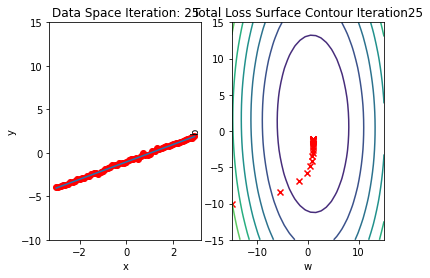

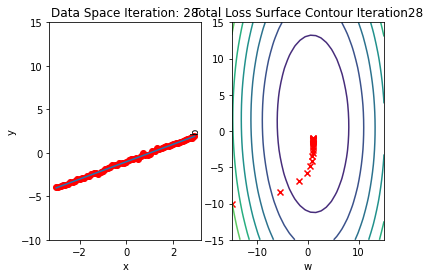

In [30]:
train_model(15)

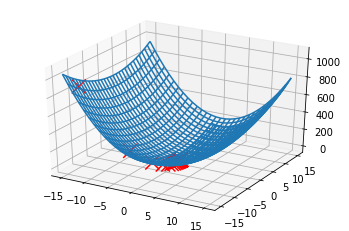

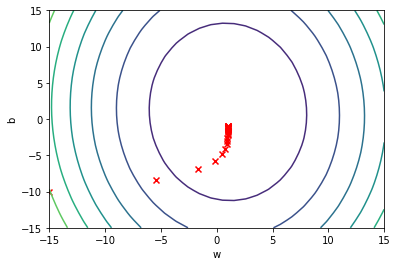

Text(24.125, 0.5, 'Cost')

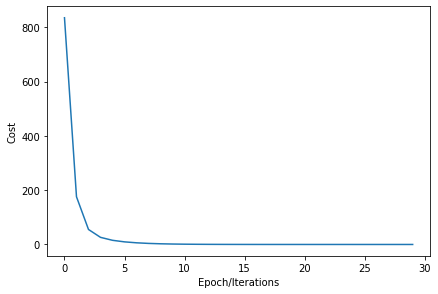

In [31]:
get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")